In [495]:
import torch.nn as nn
import torch
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms

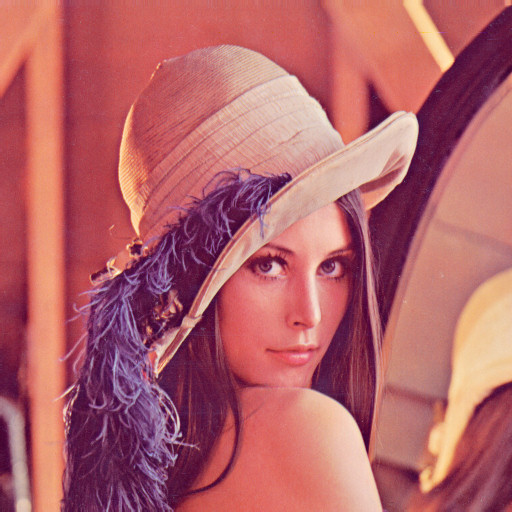

In [496]:
img = Image.open('woman.png').convert('RGB')
img

In [497]:
img_transform = transforms.Compose([transforms.ToTensor()])
img_tensor = img_transform(img)
img_tensor = torch.unsqueeze(img_tensor, 0)
img_tensor.shape

torch.Size([1, 3, 512, 512])

In [499]:
filters = torch.empty(3, 3, 5, 5)
nn.init.xavier_normal_(filters)
conv2d_f = F.conv2d(input=img_tensor,
                    weight=filters,
                    bias=None,
                    stride=3, padding=2, dilation=1, groups=1)
conv2d_f.shape

torch.Size([1, 3, 171, 171])

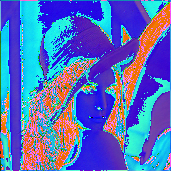

In [500]:
transforms.ToPILImage()(torch.squeeze(conv2d_f))

In [502]:
conv_transpose2d_f = F.conv_transpose2d(input=conv2d_f,
                                        weight=filters,
                                        bias=None,
                                        stride=3, padding=2, dilation=1, groups=1, output_padding=1)
'''
input – input tensor of shape (minibatch, in_channels, iH, iW)
weight – filters of shape (in_channels, groups/out_channels, kH, kW)
bias – optional bias of shape (out_channels). Default: None
'''
conv_transpose2d_f.shape

torch.Size([1, 3, 512, 512])

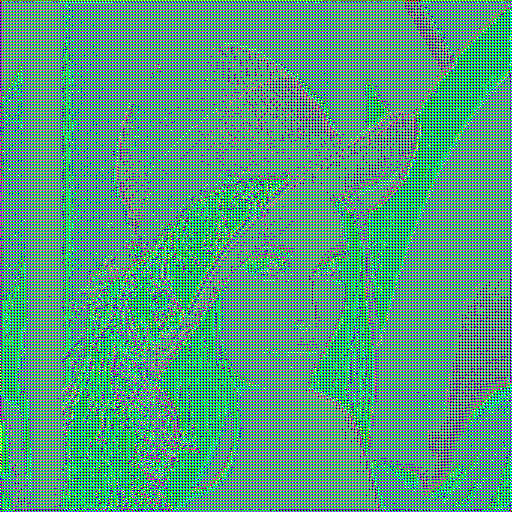

In [503]:
transforms.ToPILImage()(torch.squeeze(conv_transpose2d_f)) # 不能转换回原始图片,只是形状上相同.且易出现棋盘效应